# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
load_dotenv()
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sdjac\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")
len(api_key)

32

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
Database = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
Bitcoin_headlines = Database.get_everything(
    q="Bitcoin",
    language="en",
    page_size=50, 
    sort_by="relevancy" 
)

In [5]:

# Fetch the Ethereum news articles
Ethereum_headlines = Database.get_everything(
    q="Ethereum",
    language="en",
    page_size=50, 
    sort_by="relevancy" 
)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_sentiments = []

for article in Bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
        


# Create DataFrame
Bitcoin_df = pd.DataFrame(Bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
Bitcoin_df = Bitcoin_df[cols]

Bitcoin_df.head()


,date,text,compound,positive,negative,neutral
0,2021-11-05T13:32:14Z,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937
1,2021-10-10T20:12:00Z,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879
2,2021-10-28T16:45:00Z,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904
3,2021-10-26T18:10:00Z,"For all the talk of democratizing finance, the...",0.0000,0.000,0.000,1.000
4,2021-10-21T03:27:00Z,Representation of cryptocurrency Bitcoin is pl...,0.0000,0.000,0.000,1.000


In [7]:
# Create the Ethereum sentiment scores DataFrame
Ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
        


# Create DataFrame
Ethereum_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
Ethereum_df = Ethereum_df[cols]

Ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-10-16T18:50:00Z,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000
1,2021-10-14T17:10:45Z,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000
2,2021-11-05T12:06:22Z,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906
3,2021-11-01T16:35:14Z,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907
4,2021-11-01T15:34:40Z,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903


In [8]:
# Describe the Bitcoin Sentiment
Bitcoin_df.describe()

,compound,positive,negative,neutral
count,50.000000,50.000000,50.000000,50.000000
mean,0.092394,0.036260,0.016540,0.947220
std,0.293472,0.054307,0.037351,0.065804
min,-0.648600,0.000000,0.000000,0.769000
25%,0.000000,0.000000,0.000000,0.895500
50%,0.000000,0.000000,0.000000,1.000000
75%,0.332100,0.075750,0.000000,1.000000
max,0.755800,0.199000,0.144000,1.000000


In [9]:
# Describe the Ethereum Sentiment
Ethereum_df.describe()

,compound,positive,negative,neutral
count,50.000000,50.000000,50.000000,50.000000
mean,0.205696,0.055460,0.014920,0.929620
std,0.342762,0.065289,0.042596,0.072937
min,-0.659700,0.000000,0.000000,0.767000
25%,0.000000,0.000000,0.000000,0.890250
50%,0.000000,0.030500,0.000000,0.933000
75%,0.506425,0.096250,0.000000,1.000000
max,0.822500,0.233000,0.209000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of SWwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')


# Expand the default SWwords list if necessary
list(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sdjac\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
#words = list(filter(lambda t: t not in punctuation, words))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Remove the stop words
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in stop_words]
        
    
    return tokens


In [13]:
# Create a new tokens column for Bitcoin
Bitcoin_df['tokens']=[tokenizer(word) for word in Bitcoin_df['text']]
Bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-11-05T13:32:14Z,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937,"[similar, hoax, earlier, year, tied, walmart, ..."
1,2021-10-10T20:12:00Z,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879,"[specifically, someone, make, massive, purchas..."
2,2021-10-28T16:45:00Z,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904,"[theres, big, new, presence, slurping, power, ..."
3,2021-10-26T18:10:00Z,"For all the talk of democratizing finance, the...",0.0000,0.000,0.000,1.000,"[talk, democratizing, finance, vast, majority,..."
4,2021-10-21T03:27:00Z,Representation of cryptocurrency Bitcoin is pl...,0.0000,0.000,0.000,1.000,"[representation, cryptocurrency, bitcoin, plac..."


In [14]:
# Create a new tokens column for Ethereum
Ethereum_df['tokens']=[tokenizer(word) for word in Ethereum_df['text']]
Ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-10-16T18:50:00Z,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000,"[new, crosschain, bridge, currently, connected..."
1,2021-10-14T17:10:45Z,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000,"[mark, cuban, ha, advice, people, new, investi..."
2,2021-11-05T12:06:22Z,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906,"[ethereum, bitcoin, two, biggest, cryptocurren..."
3,2021-11-01T16:35:14Z,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907,"[elon, muskpicture, alliance, getty, imagesa, ..."
4,2021-11-01T15:34:40Z,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903,"[cryptocurrency, business, continuity, line, i..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
Bitcoin_ngram = []
for token in Bitcoin_df['tokens']:
    for text in token:
        Bitcoin_ngram.append(text)
bitcoin_bigram_counts = Counter(ngrams(Bitcoin_ngram, n=2))
bitcoin_bigram_counts.most_common(10)


[(('oct', 'reuters'), 11),
 (('illustration', 'taken'), 10),
 (('char', 'representation'), 8),
 (('reuters', 'bitcoin'), 8),
 (('representation', 'virtual'), 8),
 (('virtual', 'cryptocurrency'), 8),
 (('picture', 'illustration'), 8),
 (('cryptocurrency', 'bitcoin'), 7),
 (('bitcoin', 'seen'), 7),
 (('char', 'bitcoin'), 7)]

In [17]:
# Generate the Ethereum N-grams where N=2
Ethereum_ngram = []
for token in Ethereum_df['tokens']:
    for text in token:
        Ethereum_ngram.append(text)
Ethereum_bigram_counts = Counter(ngrams(Ethereum_ngram, n=2))
Ethereum_bigram_counts.most_common(10)

[(('illustration', 'taken'), 7),
 (('taken', 'june'), 6),
 (('new', 'york'), 4),
 (('bitcoin', 'ethereum'), 4),
 (('ethereum', 'dogecoin'), 4),
 (('nov', 'reuters'), 4),
 (('representation', 'virtual'), 4),
 (('virtual', 'cryptocurrency'), 4),
 (('picture', 'illustration'), 4),
 (('build', 'citydao'), 4)]

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
token_count(Bitcoin_ngram, 10)

[('bitcoin', 50),
 ('char', 48),
 ('reuters', 17),
 ('cryptocurrency', 16),
 ('representation', 14),
 ('illustration', 12),
 ('oct', 12),
 ('seen', 12),
 ('new', 11),
 ('taken', 11)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
token_count(Ethereum_ngram, 10)

[('char', 50),
 ('cryptocurrency', 21),
 ('bitcoin', 20),
 ('ethereum', 15),
 ('new', 13),
 ('ha', 11),
 ('reuters', 9),
 ('ether', 8),
 ('illustration', 7),
 ('taken', 7)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [22]:
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

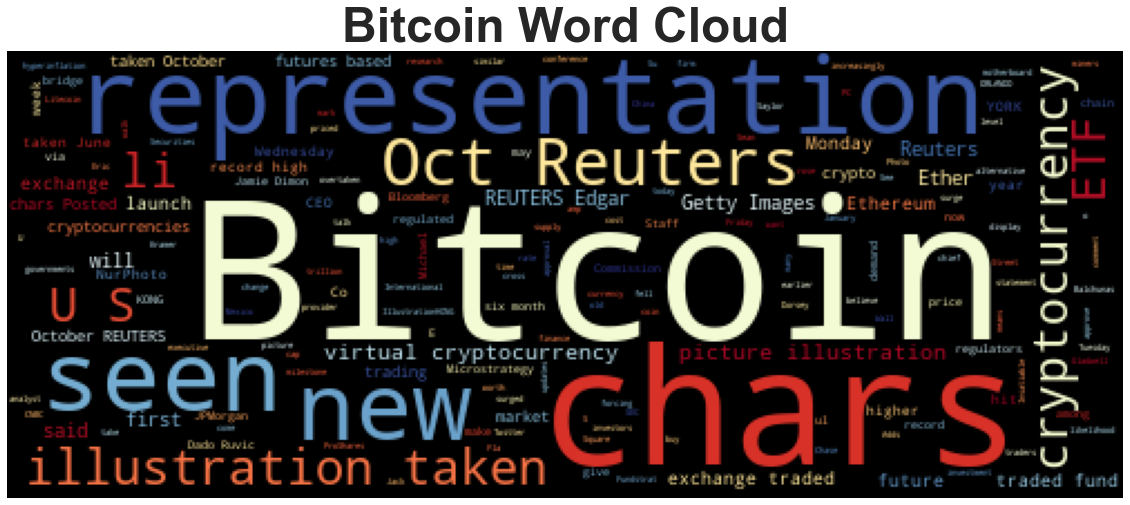

In [23]:
# Generate the Bitcoin word cloud
wordcloud(Bitcoin_df.text.str.cat(), title="Bitcoin Word Cloud")

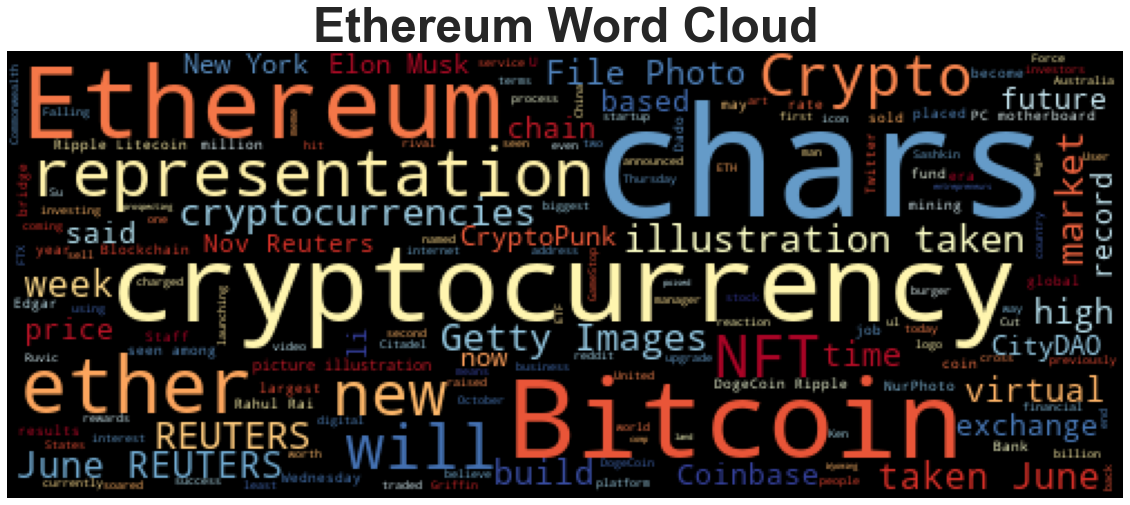

In [24]:
# Generate the Ethereum word cloud
wordcloud(Ethereum_df.text.str.cat(), title="Ethereum Word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [28]:
# Concatenate all of the Bitcoin text together
bitcoin_big_string = listToString(Bitcoin_df['text'])

NameError: name 'listToString' is not defined

In [ ]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_big_string)

# Add a title to the document
bitcoin_doc.user_data['title'] = 'Bitcoin NER'

In [ ]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')


In [ ]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text, ent.label_)

---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
ethereum_big_string = listToString(Ethereum_df['text'])

In [ ]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
ethereum_doc = nlp(ethereum_big_string)

# Add a title to the document
ethereum_doc.user_data['title'] = 'Ethereum NER'

In [ ]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [ ]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text, ent.label_)

---